In [1]:
import numpy
import matplotlib.pyplot
import scipy.special
%matplotlib inline

# 뉴럴네트워크

In [2]:
class NeuralNetwork:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.lr = learningrate
        
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        self.activation_function = lambda x: scipy.special.expit(x)
        
        #print(self.wih)
        #print(self.who)
        pass
    
    def train(self, inputs_list, targets_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        #print('inputs_list.shape:', inputs_list.shape, ', inputs.shape:', inputs.shape)
        #print('targets_list.shape:', targets_list.shape, ', targets.shape:', targets.shape)

        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        #print('hidden_inputs.shape:', hidden_inputs.shape, ', hidden_outputs.shape:', hidden_outputs.shape)

        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        #print('final_inputs.shape:', final_inputs.shape, ', final_outputs.shape:', final_outputs.shape)
        
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors)
        #print('output_errors.shape:', output_errors.shape, ', hidden_errors.shape:', hidden_errors.shape)

        self.who += self.lr * numpy.dot((output_errors*final_outputs * 
                                         (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors*hidden_outputs * 
                                         (1.0 - hidden_outputs)), numpy.transpose(inputs))
        #print('self.who.shape:', self.who.shape, ', self.wih.shape:', self.wih.shape)
        #print(output_errors)
        #print(final_outputs)
        #print(output_errors * final_outputs)
    
    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        #print(inputs_list)
        #print(inputs)
                
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        return final_outputs

# 초기값 설정, 객체 생성, 데이터 로드

In [8]:
input_nodes = 784
hidden_nodes = 500
output_nodes = 10

learning_rate = 0.1
n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

data_file = open("mnist_dataset/mnist_train.csv", 'r')
#data_file = open("mnist_dataset/mnist_train_100.csv", 'r')
data_list = data_file.readlines()
data_file.close()

test_data_file = open("mnist_dataset/mnist_test.csv", 'r')
#test_data_file = open("mnist_dataset/mnist_test_10.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

# 정상 동작 여부 테스트

(784,)
(10,)
5


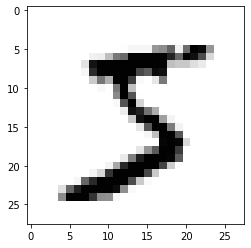

In [4]:
all_values = data_list[0].split(',')
inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
print(inputs.shape)
targets = numpy.zeros(output_nodes) + 0.01
print(targets.shape)
targets[int(all_values[0])] = 0.99
n.train(inputs, targets)
print(all_values[0])
matplotlib.pyplot.imshow(inputs.reshape(28,28), cmap='Greys', interpolation='None')
matplotlib.pyplot.show()

# 10회 학습 및 테스트

In [5]:
for idx in range(10):
    for record in data_list:
        all_values = record.split(',')
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        targets = numpy.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        
    score_card = []
    for record in test_data_list:
        all_values =record.split(',')
        result = n.query((numpy.asfarray(all_values[1:])/255.0 * 0.99)+0.01)
        if int(all_values[0]) == numpy.argmax(result):
            score_card.append(1)
        else:
            score_card.append(0)

    score_card_array = numpy.asarray(score_card)
    print( "performance[", idx, "]=", score_card_array.sum() / score_card_array.size)

performance[ 0 ]= 0.9338
performance[ 1 ]= 0.9501
performance[ 2 ]= 0.9535
performance[ 3 ]= 0.9447
performance[ 4 ]= 0.949
performance[ 5 ]= 0.9511
performance[ 6 ]= 0.9486
performance[ 7 ]= 0.9506
performance[ 8 ]= 0.9478
performance[ 9 ]= 0.9455


# 10회 학습 및 테스트

In [7]:
for idx in range(10):
    for record in data_list:
        all_values = record.split(',')
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        targets = numpy.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        
    score_card = []
    for record in test_data_list:
        all_values =record.split(',')
        result = n.query((numpy.asfarray(all_values[1:])/255.0 * 0.99)+0.01)
        if int(all_values[0]) == numpy.argmax(result):
            score_card.append(1)
        else:
            score_card.append(0)

    score_card_array = numpy.asarray(score_card)
    print( "performance[", idx, "]=", score_card_array.sum() / score_card_array.size)

performance[ 0 ]= 0.952
performance[ 1 ]= 0.9649
performance[ 2 ]= 0.9665
performance[ 3 ]= 0.9689
performance[ 4 ]= 0.969
performance[ 5 ]= 0.9683
performance[ 6 ]= 0.9674
performance[ 7 ]= 0.9675
performance[ 8 ]= 0.9668
performance[ 9 ]= 0.9678


# 10회 학습 및 테스트

In [9]:
for idx in range(10):
    for record in data_list:
        all_values = record.split(',')
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        targets = numpy.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        
    score_card = []
    for record in test_data_list:
        all_values =record.split(',')
        result = n.query((numpy.asfarray(all_values[1:])/255.0 * 0.99)+0.01)
        if int(all_values[0]) == numpy.argmax(result):
            score_card.append(1)
        else:
            score_card.append(0)

    score_card_array = numpy.asarray(score_card)
    print( "performance[", idx, "]=", score_card_array.sum() / score_card_array.size)

performance[ 0 ]= 0.9607
performance[ 1 ]= 0.968
performance[ 2 ]= 0.9726
performance[ 3 ]= 0.9745
performance[ 4 ]= 0.9755
performance[ 5 ]= 0.9757
performance[ 6 ]= 0.977
performance[ 7 ]= 0.9766
performance[ 8 ]= 0.9756
performance[ 9 ]= 0.9756


# 10건 데이터 로드 및 테스트

In [6]:
test_data_file = open("mnist_dataset/mnist_test_10.csv", 'r')
test_data_list10 = test_data_file.readlines()
test_data_file.close()

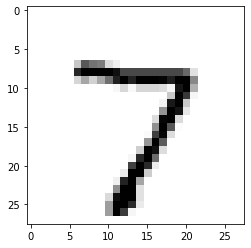

7   7


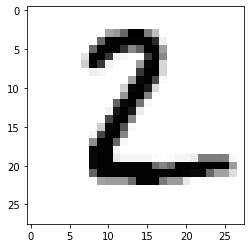

2   2


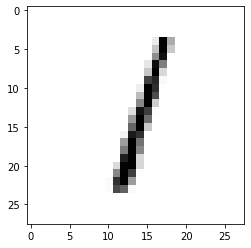

1   1


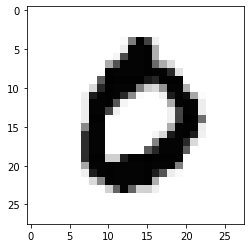

0   0


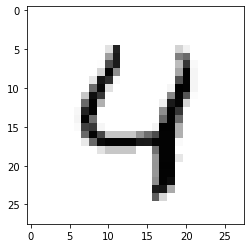

4   4


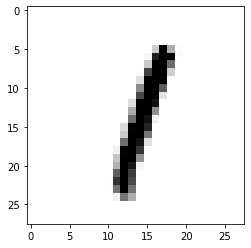

1   1


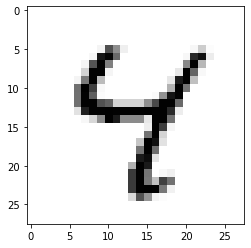

4   4


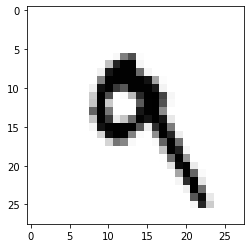

9   9


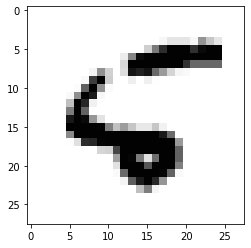

5   5


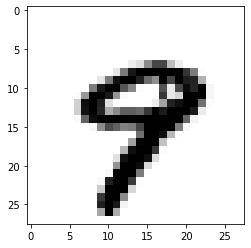

9   9
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
performance= 1.0


In [47]:
score_card = []
for idx in range(10):
    all_values = test_data_list[idx].split(',')
    image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
    matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')
    matplotlib.pyplot.show()
    result = n.query((numpy.asfarray(all_values[1:])/255.0 * 0.99)+0.01)
    print(all_values[0], ' ', numpy.argmax(result))
    if int(all_values[0]) == numpy.argmax(result):
        score_card.append(1)
    else:
        score_card.append(0)

    #print(result)
print(score_card)
score_card_array = numpy.asarray(score_card)
print( "performance=", score_card_array.sum() / score_card_array.size)

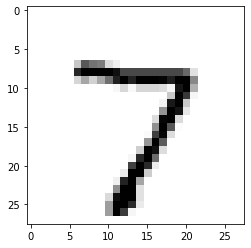

7   7


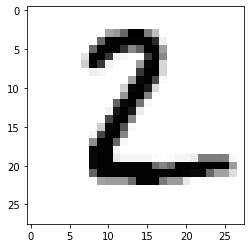

2   2


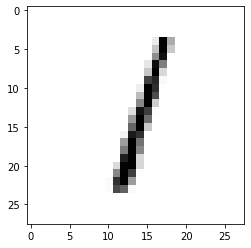

1   1


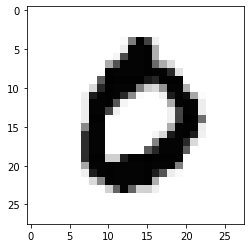

0   0


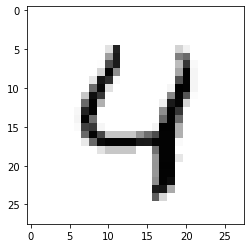

4   4


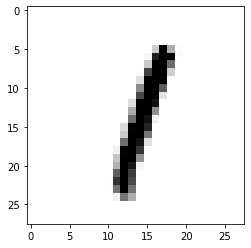

1   1


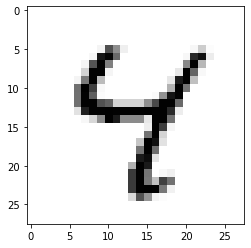

4   4


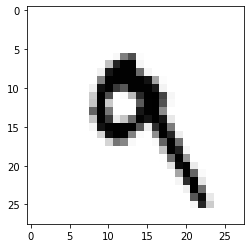

9   4


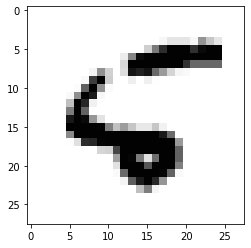

5   4


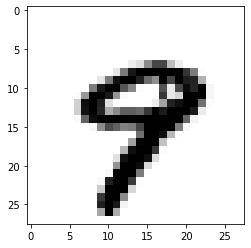

9   7
[1, 1, 1, 1, 1, 1, 1, 0, 0, 0]


In [40]:
score_card = []
for idx in range(10):
    all_values = test_data_list[idx].split(',')
    image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
    matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')
    matplotlib.pyplot.show()
    result = n.query((numpy.asfarray(all_values[1:])/255.0 * 0.99)+0.01)
    print(all_values[0], ' ', numpy.argmax(result))
    if int(all_values[0]) == numpy.argmax(result):
        score_card.append(1)
    else:
        score_card.append(0)

    #print(result)
print(score_card)

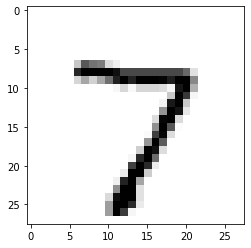

7   7


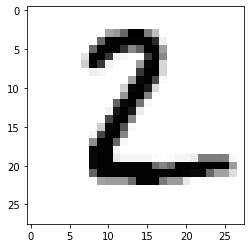

2   2


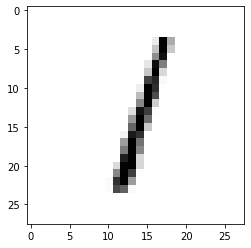

1   1


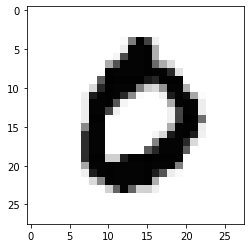

0   0


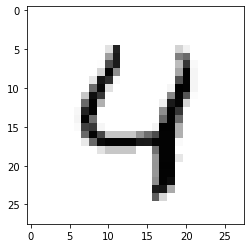

4   4


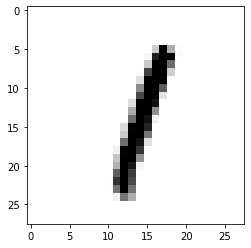

1   1


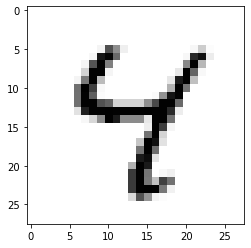

4   4


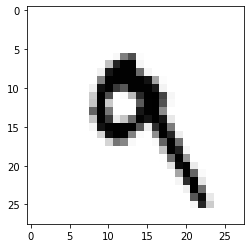

9   9


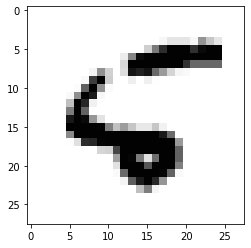

5   5


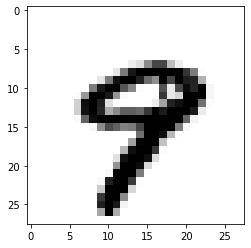

9   9
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [28]:
score_card = []
for idx in range(10):
    all_values = test_data_list[idx].split(',')
    image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
    matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')
    matplotlib.pyplot.show()
    result = n.query((numpy.asfarray(all_values[1:])/255.0 * 0.99)+0.01)
    print(all_values[0], ' ', numpy.argmax(result))
    if int(all_values[0]) == numpy.argmax(result):
        score_card.append(1)
    else:
        score_card.append(0)

    #print(result)
print(score_card)

# 직접 작성한 이미지로 테스트

In [10]:
import imageio

(28, 28, 4)


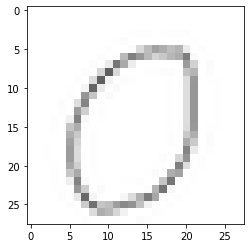

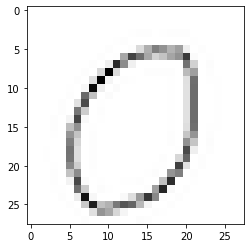

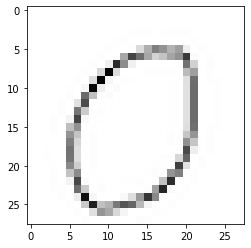

[[9.39043761e-04]
 [1.59437977e-04]
 [1.72455901e-04]
 [6.57546771e-05]
 [1.41814681e-05]
 [1.62497006e-03]
 [1.26505221e-04]
 [1.39819159e-02]
 [4.19705789e-06]
 [4.90096023e-05]]
7
(28, 28, 4)


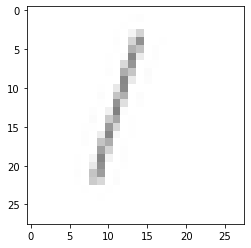

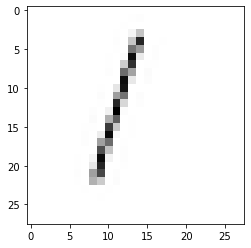

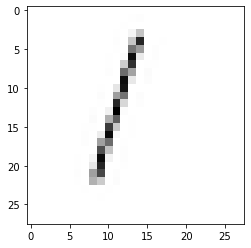

[[6.51477048e-08]
 [1.29663660e-07]
 [9.44930332e-05]
 [1.29334617e-09]
 [2.26438443e-09]
 [3.92083885e-03]
 [8.04733589e-08]
 [1.23911026e-05]
 [5.01719367e-12]
 [1.67320215e-11]]
5
(28, 28, 4)


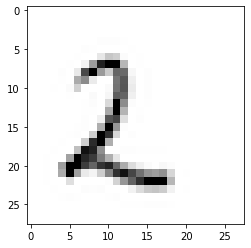

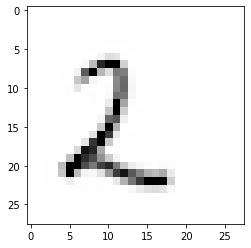

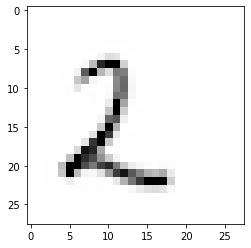

[[1.09939743e-02]
 [3.92937569e-04]
 [2.52429357e-01]
 [4.81094035e-06]
 [1.07875010e-05]
 [3.22780071e-01]
 [1.35511025e-02]
 [1.38041952e-04]
 [9.57160214e-06]
 [2.79693704e-08]]
5
(28, 28, 4)


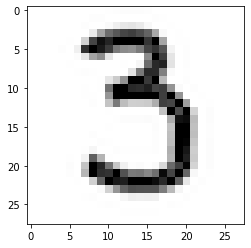

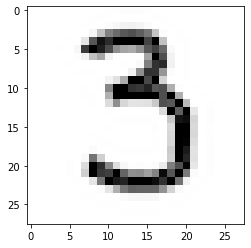

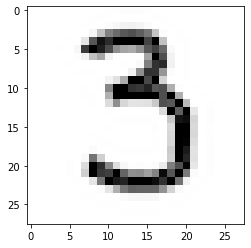

[[1.70273089e-02]
 [1.18395365e-02]
 [4.43710563e-03]
 [9.99919888e-01]
 [9.37433475e-04]
 [1.29033622e-03]
 [1.23169233e-03]
 [5.30913433e-04]
 [7.23639122e-04]
 [6.54370506e-03]]
3
(28, 28, 4)


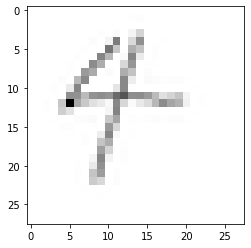

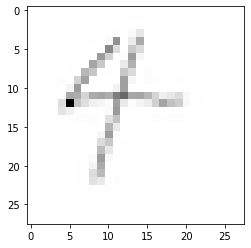

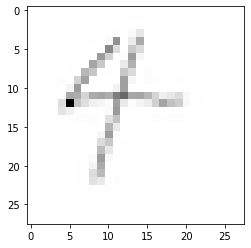

[[7.38415334e-05]
 [5.11793080e-06]
 [4.46094766e-04]
 [5.56068108e-06]
 [2.69545167e-06]
 [8.22364009e-02]
 [2.99278042e-05]
 [1.71203959e-02]
 [2.72437668e-05]
 [1.21388661e-04]]
5
(28, 28, 4)


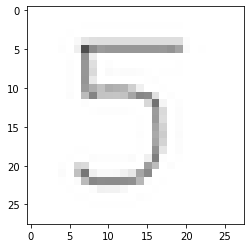

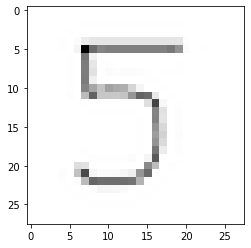

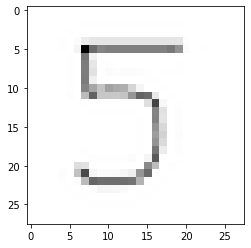

[[9.13209672e-06]
 [8.06742098e-04]
 [1.86549801e-03]
 [6.58978080e-04]
 [1.13149078e-05]
 [1.53713345e-01]
 [2.70912269e-04]
 [3.94554261e-03]
 [3.41050087e-05]
 [2.44985502e-04]]
5
(28, 28, 4)


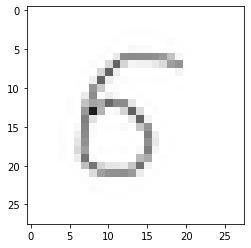

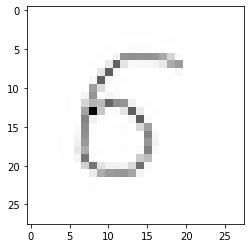

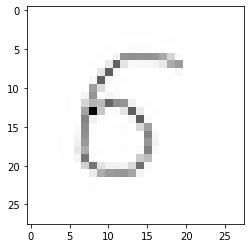

[[1.10222985e-03]
 [7.97541084e-04]
 [8.42097365e-04]
 [2.29757741e-04]
 [1.57078178e-04]
 [4.48503700e-02]
 [1.01183073e-03]
 [4.88775847e-03]
 [4.24222733e-06]
 [9.01687411e-06]]
5
(28, 28, 4)


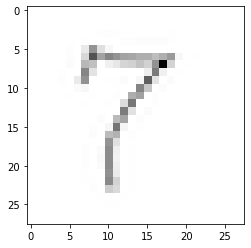

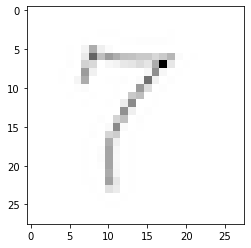

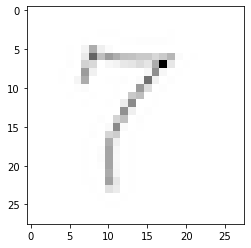

[[2.92823753e-05]
 [7.60056213e-06]
 [2.73608838e-04]
 [7.09531466e-05]
 [1.79599422e-07]
 [3.05226415e-03]
 [4.73893243e-07]
 [2.27589159e-03]
 [6.77381733e-09]
 [3.63092021e-06]]
5
(28, 28, 4)


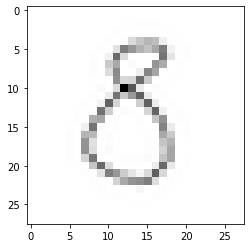

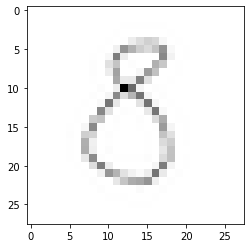

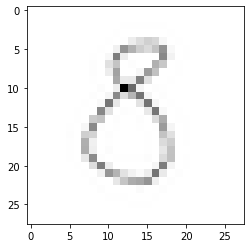

[[3.54056300e-04]
 [2.66764941e-03]
 [2.01469003e-04]
 [7.69184177e-02]
 [1.17716117e-04]
 [3.23393588e-02]
 [5.58985181e-04]
 [1.28369956e-02]
 [8.83607176e-05]
 [1.23467186e-03]]
3
(28, 28, 4)


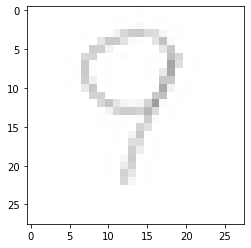

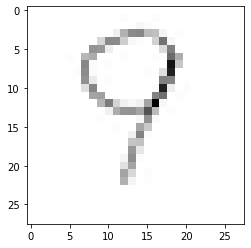

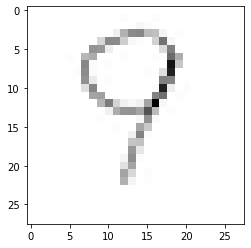

[[1.32311123e-07]
 [1.19413911e-05]
 [4.49238729e-05]
 [2.37406035e-06]
 [1.64874271e-07]
 [1.16677915e-04]
 [1.48106013e-06]
 [2.09589289e-03]
 [1.83572018e-10]
 [2.13954987e-08]]
7
[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]
performance= 0.2


In [78]:
score_card = []
for idx in range(10):
    img_array = imageio.imread('mnist_dataset/' + str(idx) + '.png')  # read a standard image
    print(img_array.shape)  # im is a numpy array

    matplotlib.pyplot.imshow(img_array, cmap='Greys', interpolation='None')
    matplotlib.pyplot.show()


    gray = lambda rgb : numpy.dot(rgb[... , :3] , [0.299 , 0.587, 0.114]) 
    img_array = gray(img_array)
    #print(img_array)

    #matplotlib.pyplot.imshow(img_array, cmap='Greys', interpolation='None')
    #matplotlib.pyplot.show()


    #print(img_array.shape)

    img_data = 255.0 - img_array.reshape(784)

    #print(img_data)
    matplotlib.pyplot.imshow(img_data.reshape(28,28), cmap='Greys', interpolation='None')
    matplotlib.pyplot.show()

    img_data = img_data/250*0.9 + 0.01
    #img_data = numpy.minimum(img_data, numpy.full(784, 0.99))

    #img_data = img_data - 25
    #img_data = numpy.minimum(img_data, numpy.full(784, 0.99))
    #img_data = numpy.maximum(img_data, numpy.full(784, 0.01))



    matplotlib.pyplot.imshow((img_data*255.0).reshape(28,28), cmap='Greys', interpolation='None')
    matplotlib.pyplot.show()

    #print(img_data.shape)
    #print(img_data)
    result = n.query(img_data)
    print(result)
    print(numpy.argmax(result))
    if idx == numpy.argmax(result):
        score_card.append(1)
    else:
        score_card.append(0)
print(score_card)
print( "performance=", numpy.array(score_card).sum() / len(score_card))

(28, 28, 4)


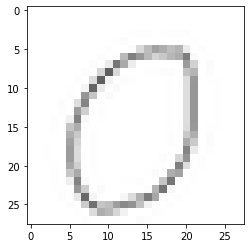

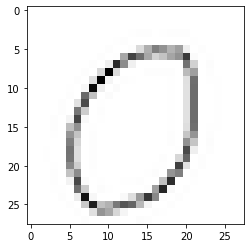

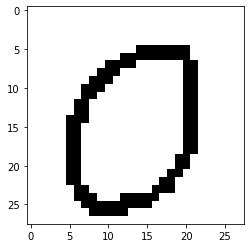

[[0.36730013]
 [0.00181216]
 [0.0013617 ]
 [0.00749896]
 [0.02880372]
 [0.01648526]
 [0.00532296]
 [0.0575295 ]
 [0.02092256]
 [0.03399869]]
0
(28, 28, 4)


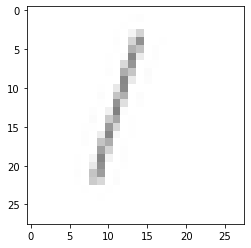

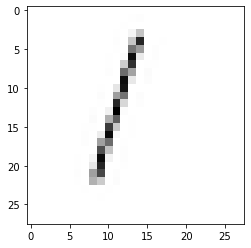

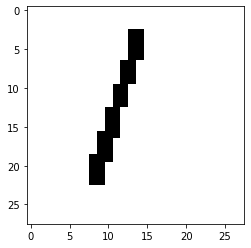

[[3.67006090e-02]
 [2.28846400e-05]
 [1.42749383e-02]
 [4.28997544e-06]
 [3.58415555e-05]
 [1.48228323e-02]
 [7.45947976e-04]
 [1.20312102e-03]
 [1.91164809e-05]
 [4.05602646e-07]]
0
(28, 28, 4)


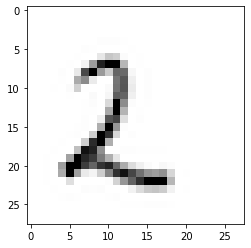

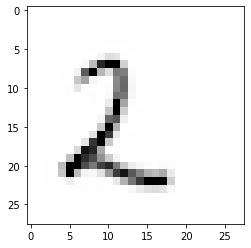

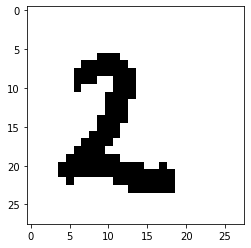

[[2.00897194e-02]
 [1.20042363e-03]
 [4.06350820e-02]
 [2.45449352e-04]
 [2.66490311e-05]
 [8.21169741e-02]
 [3.80602370e-02]
 [4.13439398e-05]
 [1.29597432e-03]
 [7.85093733e-06]]
5
(28, 28, 4)


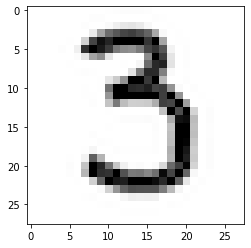

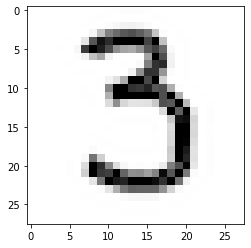

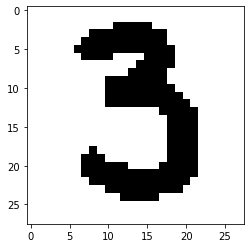

[[7.28858360e-02]
 [3.73488492e-02]
 [6.79121296e-02]
 [9.77835567e-01]
 [3.02895539e-03]
 [1.67144866e-02]
 [6.29032461e-03]
 [4.92661167e-04]
 [1.25619914e-02]
 [7.82611163e-02]]
3
(28, 28, 4)


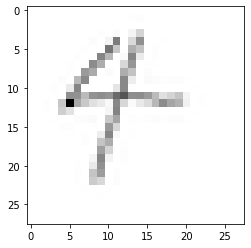

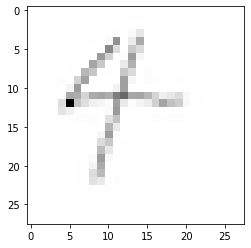

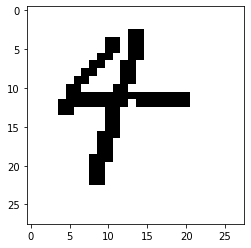

[[2.42905690e-02]
 [4.63870735e-04]
 [7.36308708e-04]
 [1.47035395e-03]
 [6.15086844e-04]
 [7.84168058e-01]
 [2.18972003e-02]
 [1.35807744e-01]
 [7.64892457e-02]
 [4.77756295e-02]]
5
(28, 28, 4)


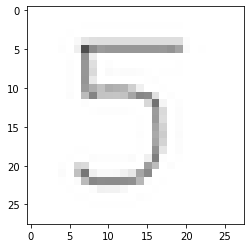

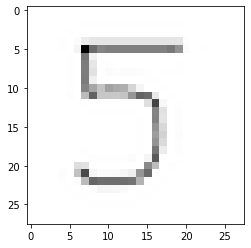

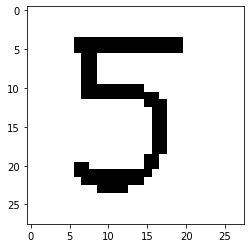

[[7.61695790e-05]
 [1.99662240e-02]
 [4.65930201e-02]
 [1.52064295e-02]
 [9.48150948e-04]
 [9.77726290e-01]
 [1.20683496e-03]
 [8.76730088e-03]
 [5.72908777e-02]
 [6.99637731e-01]]
5
(28, 28, 4)


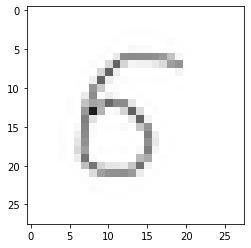

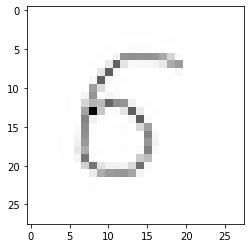

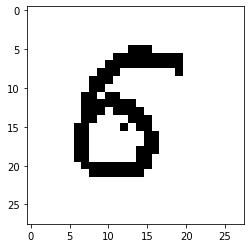

[[0.14107782]
 [0.00789386]
 [0.01580885]
 [0.00999172]
 [0.01990101]
 [0.50450844]
 [0.00484412]
 [0.05453504]
 [0.03377877]
 [0.01463391]]
5
(28, 28, 4)


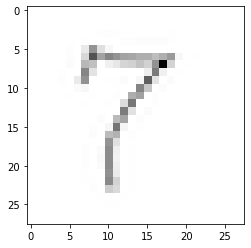

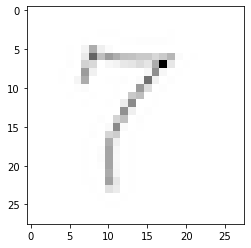

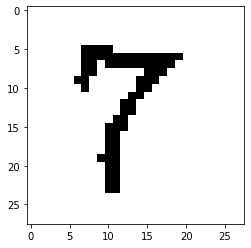

[[4.88585856e-02]
 [2.14810984e-04]
 [4.23843761e-02]
 [1.18105856e-03]
 [1.09599019e-05]
 [8.68261838e-04]
 [1.68321726e-05]
 [1.34610792e-01]
 [1.02484302e-04]
 [4.84883382e-05]]
7
(28, 28, 4)


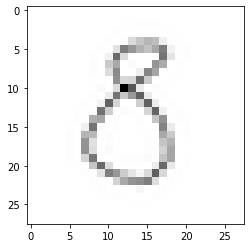

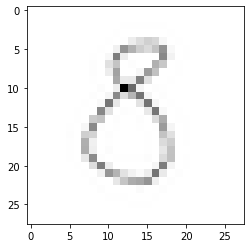

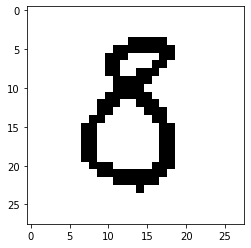

[[0.02926109]
 [0.0046133 ]
 [0.00119156]
 [0.67872142]
 [0.00285605]
 [0.01875266]
 [0.00155891]
 [0.00897025]
 [0.01598967]
 [0.02646942]]
3
(28, 28, 4)


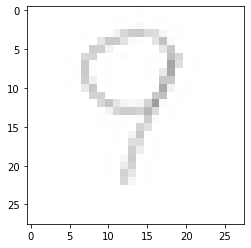

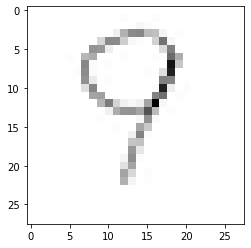

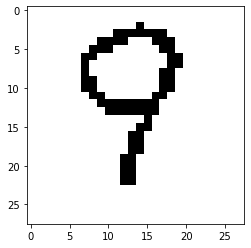

[[0.05970297]
 [0.00077611]
 [0.22874601]
 [0.10655493]
 [0.01561657]
 [0.00377275]
 [0.03510816]
 [0.25180323]
 [0.01562996]
 [0.12120165]]
7
[1, 0, 0, 1, 0, 1, 0, 1, 0, 0]
performance= 0.4


In [84]:
score_card = []
for idx in range(10):
    img_array = imageio.imread('mnist_dataset/' + str(idx) + '.png')  # read a standard image
    print(img_array.shape)  # im is a numpy array

    matplotlib.pyplot.imshow(img_array, cmap='Greys', interpolation='None')
    matplotlib.pyplot.show()


    gray = lambda rgb : numpy.dot(rgb[... , :3] , [0.299 , 0.587, 0.114]) 
    img_array = gray(img_array)
    #print(img_array)

    #matplotlib.pyplot.imshow(img_array, cmap='Greys', interpolation='None')
    #matplotlib.pyplot.show()


    #print(img_array.shape)

    img_data = 255.0 - img_array.reshape(784)

    #print(img_data)
    matplotlib.pyplot.imshow(img_data.reshape(28,28), cmap='Greys', interpolation='None')
    matplotlib.pyplot.show()

    #img_data = img_data/25*0.9 + 0.01
    #img_data = numpy.minimum(img_data, numpy.full(784, 0.99))

    img_data = img_data - 5
    img_data = numpy.minimum(img_data, numpy.full(784, 0.99))
    img_data = numpy.maximum(img_data, numpy.full(784, 0.01))



    matplotlib.pyplot.imshow((img_data*255.0).reshape(28,28), cmap='Greys', interpolation='None')
    matplotlib.pyplot.show()

    #print(img_data.shape)
    #print(img_data)
    result = n.query(img_data)
    print(result)
    print(numpy.argmax(result))
    if idx == numpy.argmax(result):
        score_card.append(1)
    else:
        score_card.append(0)
print(score_card)
print( "performance=", numpy.array(score_card).sum() / len(score_card))

(28, 28, 4)


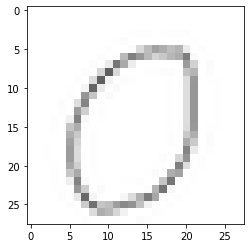

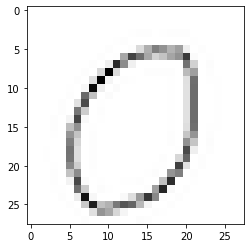

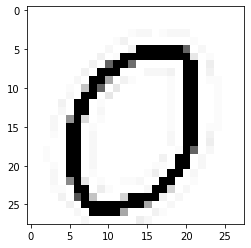

[[0.33939501]
 [0.00176866]
 [0.00208869]
 [0.01265826]
 [0.01485498]
 [0.01799644]
 [0.00693282]
 [0.03525625]
 [0.02967003]
 [0.06681781]]
0
(28, 28, 4)


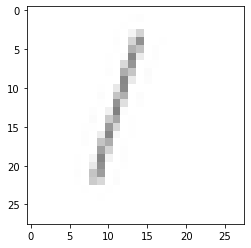

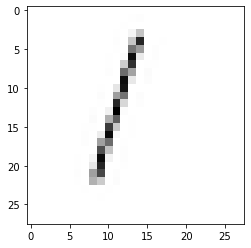

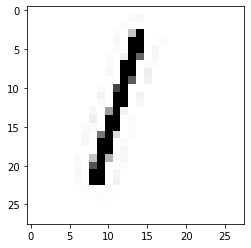

[[2.33627942e-02]
 [4.51646541e-05]
 [1.27454939e-02]
 [1.10671659e-05]
 [5.69755489e-05]
 [7.18290068e-03]
 [6.97135711e-04]
 [8.08135375e-04]
 [2.65977494e-05]
 [3.76292141e-07]]
0
(28, 28, 4)


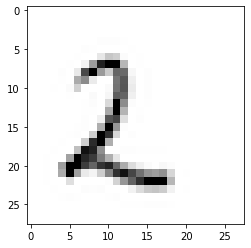

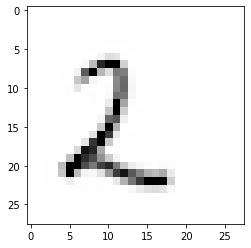

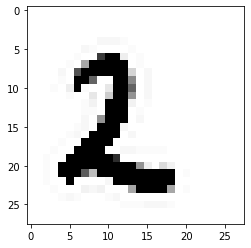

[[4.72679402e-02]
 [9.69626408e-04]
 [9.57187228e-02]
 [5.21526323e-05]
 [1.81227583e-05]
 [7.13475864e-02]
 [7.63386087e-02]
 [7.95244324e-05]
 [2.34646062e-03]
 [2.57275239e-06]]
2
(28, 28, 4)


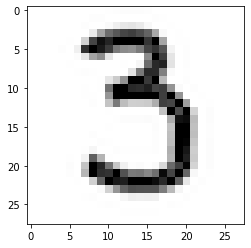

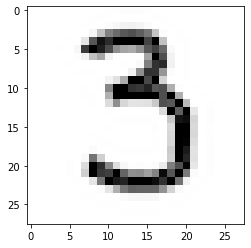

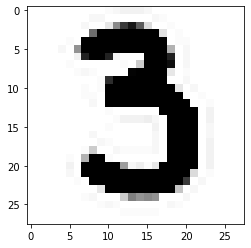

[[6.56259908e-02]
 [3.69219638e-02]
 [7.17333356e-02]
 [9.88937786e-01]
 [2.71430496e-03]
 [9.55760751e-03]
 [4.06880534e-03]
 [6.97478509e-04]
 [1.14257798e-02]
 [6.09393035e-02]]
3
(28, 28, 4)


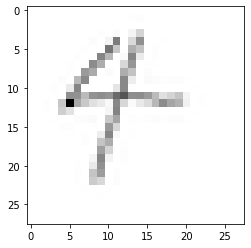

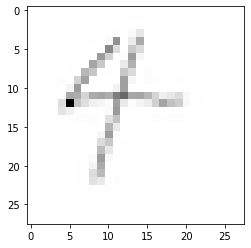

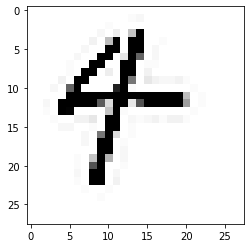

[[3.12697189e-02]
 [2.43616106e-04]
 [2.37500127e-03]
 [1.19827246e-03]
 [1.34141588e-03]
 [5.01060523e-01]
 [1.54361928e-02]
 [8.06934408e-02]
 [1.33291141e-01]
 [1.11746206e-01]]
5
(28, 28, 4)


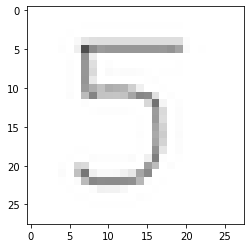

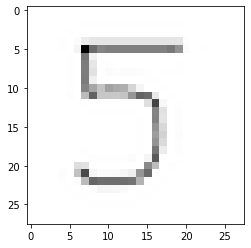

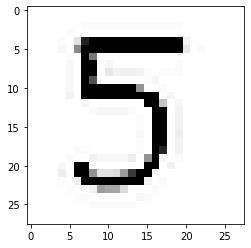

[[2.06329052e-04]
 [1.73135423e-02]
 [1.02421020e-02]
 [4.11028219e-02]
 [6.39800682e-04]
 [8.85528518e-01]
 [1.45889351e-03]
 [5.95513250e-03]
 [4.96086944e-02]
 [6.45716317e-01]]
5
(28, 28, 4)


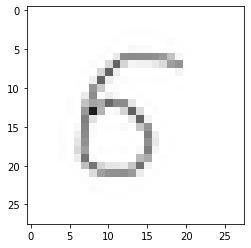

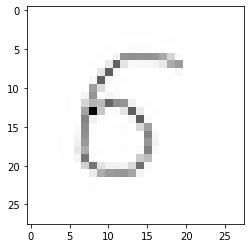

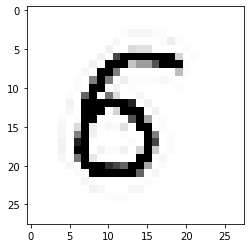

[[0.13032495]
 [0.00778932]
 [0.01512463]
 [0.01051439]
 [0.01414989]
 [0.36037821]
 [0.00674401]
 [0.05247912]
 [0.04149909]
 [0.01218347]]
5
(28, 28, 4)


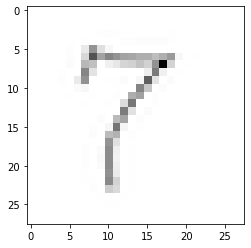

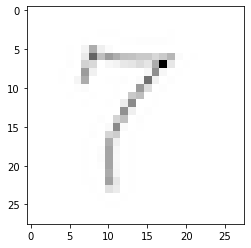

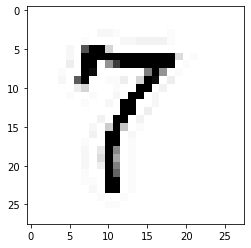

[[1.56659635e-02]
 [2.68939949e-04]
 [2.62991163e-02]
 [7.84887352e-03]
 [2.38537921e-05]
 [1.14689566e-03]
 [2.69749225e-05]
 [5.02021067e-02]
 [3.45695041e-04]
 [2.09099315e-04]]
7
(28, 28, 4)


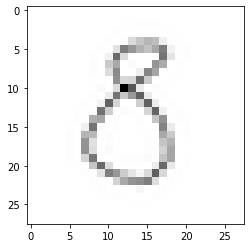

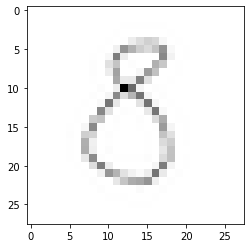

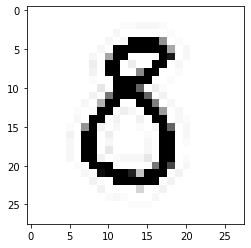

[[0.02971008]
 [0.00411789]
 [0.00184432]
 [0.48257357]
 [0.003819  ]
 [0.01829684]
 [0.00286054]
 [0.00378764]
 [0.0703891 ]
 [0.05127585]]
3
(28, 28, 4)


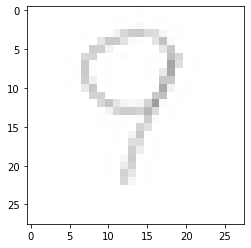

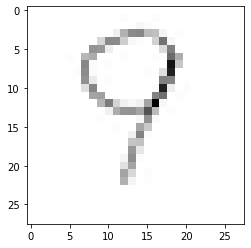

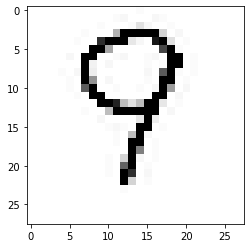

[[0.04701305]
 [0.00159278]
 [0.13738421]
 [0.04440375]
 [0.02912392]
 [0.00627607]
 [0.03021485]
 [0.09878101]
 [0.02470298]
 [0.21966709]]
9
[1, 0, 1, 1, 0, 1, 0, 1, 0, 1]
performance= 0.6


In [87]:
score_card = []
for idx in range(10):
    img_array = imageio.imread('mnist_dataset/' + str(idx) + '.png')  # read a standard image
    print(img_array.shape)  # im is a numpy array

    matplotlib.pyplot.imshow(img_array, cmap='Greys', interpolation='None')
    matplotlib.pyplot.show()


    gray = lambda rgb : numpy.dot(rgb[... , :3] , [0.299 , 0.587, 0.114]) 
    img_array = gray(img_array)
    #print(img_array)

    #matplotlib.pyplot.imshow(img_array, cmap='Greys', interpolation='None')
    #matplotlib.pyplot.show()


    #print(img_array.shape)

    img_data = 255.0 - img_array.reshape(784)

    #print(img_data)
    matplotlib.pyplot.imshow(img_data.reshape(28,28), cmap='Greys', interpolation='None')
    matplotlib.pyplot.show()

    img_data = img_data/30 + 0.01
    img_data = numpy.minimum(img_data, numpy.full(784, 0.99))

    #img_data = img_data - 5
    #img_data = numpy.minimum(img_data, numpy.full(784, 0.99))
    #img_data = numpy.maximum(img_data, numpy.full(784, 0.01))



    matplotlib.pyplot.imshow((img_data*255.0).reshape(28,28), cmap='Greys', interpolation='None')
    matplotlib.pyplot.show()

    #print(img_data.shape)
    #print(img_data)
    result = n.query(img_data)
    print(result)
    print(numpy.argmax(result))
    if idx == numpy.argmax(result):
        score_card.append(1)
    else:
        score_card.append(0)
print(score_card)
print( "performance=", numpy.array(score_card).sum() / len(score_card))

# 기타 테스트 코드

(784,)
(10,)
inputs_list.shape: (784,) , inputs.shape: (784, 1)
targets_list.shape: (10,) , targets.shape: (10, 1)
hidden_inputs.shape: (100, 1) , hidden_outputs.shape: (100, 1)
final_inputs.shape: (10, 1) , final_outputs.shape: (10, 1)
output_errors.shape: (10, 1) , hidden_errors.shape: (100, 1)
self.who.shape: (10, 100) , self.wih.shape: (100, 784)
[[-0.16167779]
 [ 0.00328806]
 [-0.0334469 ]
 [-0.13799644]
 [ 0.00537561]
 [ 0.97918409]
 [-0.01178398]
 [-0.00469822]
 [-0.06161693]
 [ 0.00940501]]
[[0.17167779]
 [0.00671194]
 [0.0434469 ]
 [0.14799644]
 [0.00462439]
 [0.01081591]
 [0.02178398]
 [0.01469822]
 [0.07161693]
 [0.00059499]]
[[-2.77564854e-02]
 [ 2.20692527e-05]
 [-1.45316380e-03]
 [-2.04229819e-02]
 [ 2.48589204e-05]
 [ 1.05907623e-02]
 [-2.56701833e-04]
 [-6.90554673e-05]
 [-4.41281539e-03]
 [ 5.59591335e-06]]
5


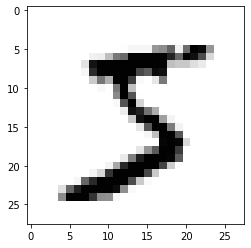

In [8]:
all_values = data_list[0].split(',')
inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 1
print(inputs.shape)
targets = numpy.zeros(output_nodes) + 0.01
print(targets.shape)
targets[int(all_values[0])] = 0.99
n.train(inputs, targets)
print(all_values[0])
matplotlib.pyplot.imshow(inputs.reshape(28,28), cmap='Greys', interpolation='None')
matplotlib.pyplot.show()

In [81]:
len(data_list)

100

In [82]:
data_list[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [83]:
all_values = data_list[1].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
print(all_values)
print(image_array)

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '51', '159', '253', '159', '50', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '48', '238', '252', '252', '252', '237', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '54', '227', '253', '252', '239', '233', '252', '57', '6', '0', '0', '

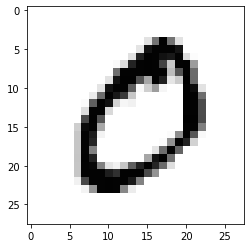

In [84]:
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

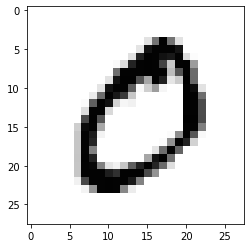

In [85]:
matplotlib.pyplot.imshow(image_array, cmap='Greys')

In [86]:
scaled_input = (numpy.asfarray(all_values[1:])/ 255.0 * 0.99) + 0.01
print(scaled_input)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

In [87]:
onodes = 10
targets = numpy.zeros(onodes)+0.01
targets[int(all_values[0])] = 0.99

In [88]:
targets

array([0.99, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

In [89]:
n.train(scaled_input, targets)

In [45]:
a = numpy.asarray([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
print(a)
print(type(a))
print(a.shape)
print(a.ndim)
print(len(a))
print(a.size)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
<class 'numpy.ndarray'>
(3, 4)
2
3
12


In [35]:
a = [1]

In [37]:
a

[1]

In [31]:
b = (1)

In [30]:
b

(1,)

In [39]:
type(a)

list

In [38]:
c = (1,)
print(c)
print(len(c))
print(type(c))

(1,)
1
<class 'tuple'>
